In [1]:
import requests
import pandas as pd

# Step 1: Search for the Ngram and get IDs
def search_ngram(query, corpus='eng', flags='cs'):
    url = f"https://api.ngrams.dev/{corpus}/search"
    params = {
        'query': query,
        'flags': flags
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        raise Exception(f"Error fetching data: {response.status_code} - {response.text}")
    
    data = response.json()
    ngram_ids = [ngram['id'] for ngram in data.get('ngrams', [])]
    return ngram_ids

# Step 2: Fetch year-based match counts using the ID
def fetch_ngram_by_id(ngram_id, corpus='eng'):
    url = f"https://api.ngrams.dev/{corpus}/{ngram_id}"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error fetching ngram details: {response.status_code} - {response.text}")
    
    return response.json()

# Aggregating the data
def aggregate_ngram_data(ngram_ids, corpus):
    all_data = pd.DataFrame()
    for ngram_id in ngram_ids:
        details = fetch_ngram_by_id(ngram_id, corpus)
        if 'stats' in details:
            df = pd.DataFrame(details['stats'])
            df['year'] = df['year'].astype(int)
            df.set_index('year', inplace=True)
            all_data = all_data.add(df, fill_value=0) if not all_data.empty else df
    return all_data

try:
    # Step 1: Search for the term and get its ngram IDs
    german_ids = search_ngram("Internet", 'ger', 'cs')
    english_ids = search_ngram("Internet", 'eng', 'cs')
    russian_ids = search_ngram("Интернет", 'rus', 'cs')

    # Step 2: Fetch the year-based match counts and aggregate
    german_data = aggregate_ngram_data(german_ids, 'ger')
    english_data = aggregate_ngram_data(english_ids, 'eng')
    russian_data = aggregate_ngram_data(russian_ids, 'rus')

    # Filter for years after 1950
    german_data = german_data[german_data.index >= 1950]
    english_data = english_data[english_data.index >= 1950]
    russian_data = russian_data[russian_data.index >= 1950]

    print(german_data)
    print(english_data)
    print(russian_data)

except Exception as e:
    print(e)


      absMatchCount  relMatchCount
year                              
1950            169   2.312171e-07
1951             43   6.627794e-08
1952            209   2.872567e-07
1953            114   1.423307e-07
1954            169   1.881693e-07
...             ...            ...
2015         365067   5.797065e-05
2016         326244   5.377076e-05
2017         320866   4.822970e-05
2018         324755   5.551796e-05
2019         278382   5.431098e-05

[70 rows x 2 columns]
      absMatchCount  relMatchCount
year                              
1950           1159   1.343267e-07
1951            678   8.115660e-08
1952            248   2.952270e-08
1953            780   9.238306e-08
1954           1456   1.686684e-07
...             ...            ...
2015        1111112   4.153226e-05
2016        1161083   4.349087e-05
2017         932851   3.392802e-05
2018         746010   2.835935e-05
2019         695386   3.046444e-05

[70 rows x 2 columns]
      absMatchCount  relMatchCount
year     

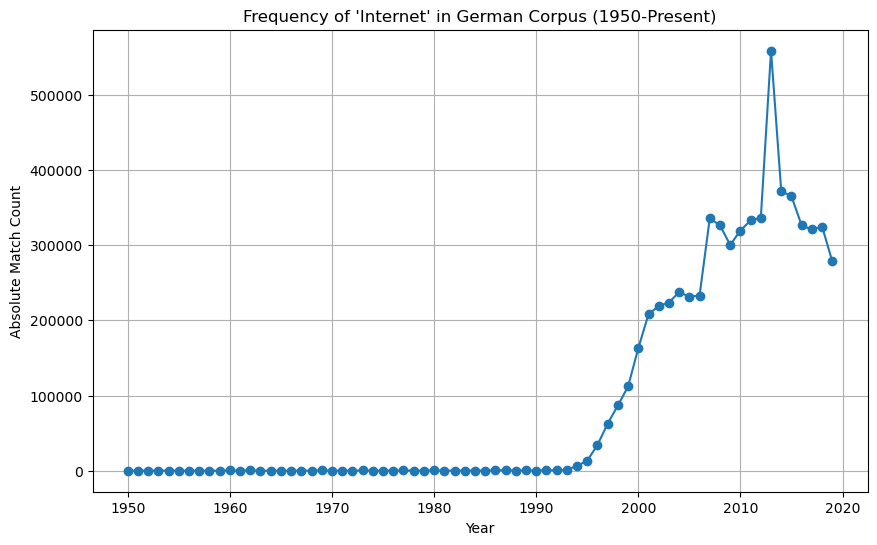

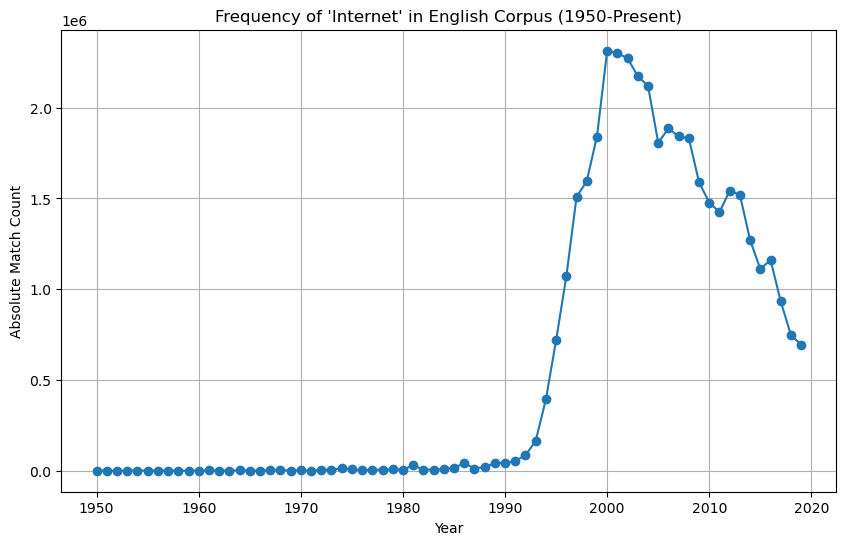

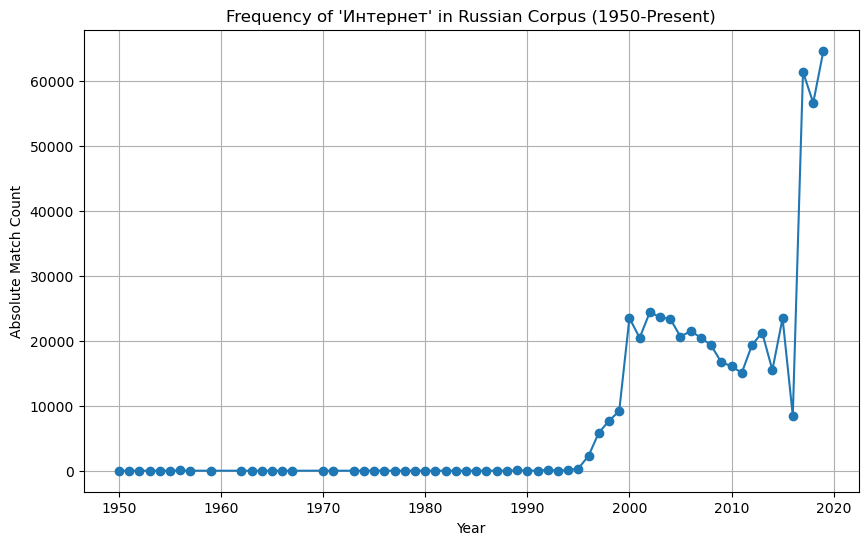

In [2]:
import matplotlib.pyplot as plt

def plot_ngram_frequency(data, title):
    if not data.empty:
        plt.figure(figsize=(10, 6)) 
        data['absMatchCount'].plot(kind='line', marker='o')
        plt.title(title)
        plt.xlabel('Year')
        plt.ylabel('Absolute Match Count')
        plt.grid(True)
        plt.show() 
    else:
        print(f"No data to plot for: {title}")

try:
    german_ids = search_ngram("Internet", 'ger', 'cs')
    english_ids = search_ngram("Internet", 'eng', 'cs')
    russian_ids = search_ngram("Интернет", 'rus', 'cs')

    german_data = aggregate_ngram_data(german_ids, 'ger')
    english_data = aggregate_ngram_data(english_ids, 'eng')
    russian_data = aggregate_ngram_data(russian_ids, 'rus')

    german_data = german_data[german_data.index >= 1950]
    english_data = english_data[english_data.index >= 1950]
    russian_data = russian_data[russian_data.index >= 1950]

    plot_ngram_frequency(german_data, "Frequency of 'Internet' in German Corpus (1950-Present)")
    plot_ngram_frequency(english_data, "Frequency of 'Internet' in English Corpus (1950-Present)")
    plot_ngram_frequency(russian_data, "Frequency of 'Интернет' in Russian Corpus (1950-Present)")

except Exception as e:
    print(e)


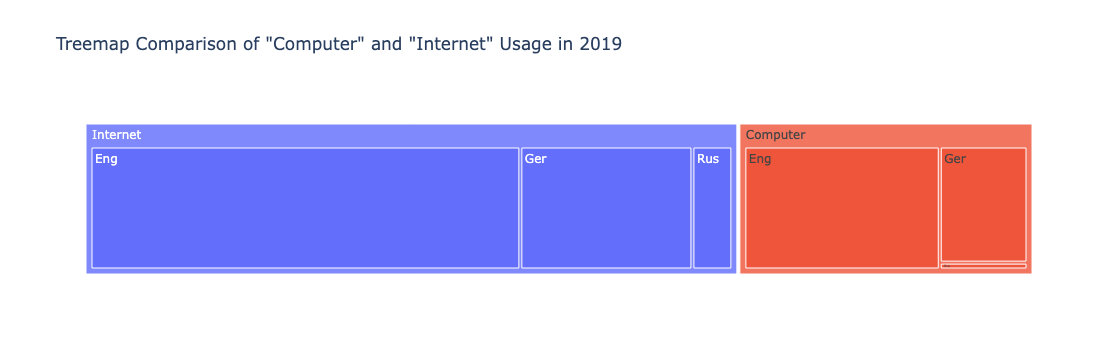

In [36]:
import requests
import pandas as pd
import plotly.express as px

def search_ngram(query, corpus='eng', flags='cs'):
    url = f"https://api.ngrams.dev/{corpus}/search"
    params = {
        'query': query,
        'flags': flags
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        raise Exception(f"Error fetching data: {response.status_code} - {response.text}")
    data = response.json()
    ngram_ids = [ngram['id'] for ngram in data.get('ngrams', [])]
    return ngram_ids

def fetch_ngram_by_id(ngram_id, corpus='eng'):
    url = f"https://api.ngrams.dev/{corpus}/{ngram_id}"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error fetching ngram details: {response.status_code} - {response.text}")
    return response.json()

def aggregate_ngram_data(ngram_ids, corpus):
    all_data = pd.DataFrame()
    for ngram_id in ngram_ids:
        details = fetch_ngram_by_id(ngram_id, corpus)
        if 'stats' in details:
            df = pd.DataFrame(details['stats'])
            df['year'] = df['year'].astype(int)
            df.set_index('year', inplace=True)
            all_data = all_data.add(df, fill_value=0) if not all_data.empty else df
    return all_data

try:
    terms = {'Computer': ['Computer', 'Computer', 'Компьютер'], 'Internet': ['Internet', 'Internet', 'Интернет']}
    corpora = ['eng', 'ger', 'rus']
    
    data_dict = {}
    
    for term, queries in terms.items():
        for lang, corpus in zip(queries, corpora):
            ids = search_ngram(lang, corpus)
            data = aggregate_ngram_data(ids, corpus)
            data = data[data.index >= 1950]  
            data_dict[f"{term}_{corpus}"] = data

    year = 2019

    combined_data = {
        'Term': [],
        'Language': [],
        'Usage': []
    }
    
    for term, queries in terms.items():
        for corpus, lang in zip(corpora, queries):
            data_key = f"{term}_{corpus}"
            if year in data_dict[data_key].index:
                combined_data['Term'].append(term)
                combined_data['Language'].append(corpus.capitalize())
                combined_data['Usage'].append(data_dict[data_key].loc[year, 'absMatchCount'])

    df_combined = pd.DataFrame(combined_data)

    fig = px.treemap(df_combined, path=['Term', 'Language'], values='Usage',
                     title=f'Treemap Comparison of "Computer" and "Internet" Usage in {year}')
    fig.show()
    
except Exception as e:
    print(e)

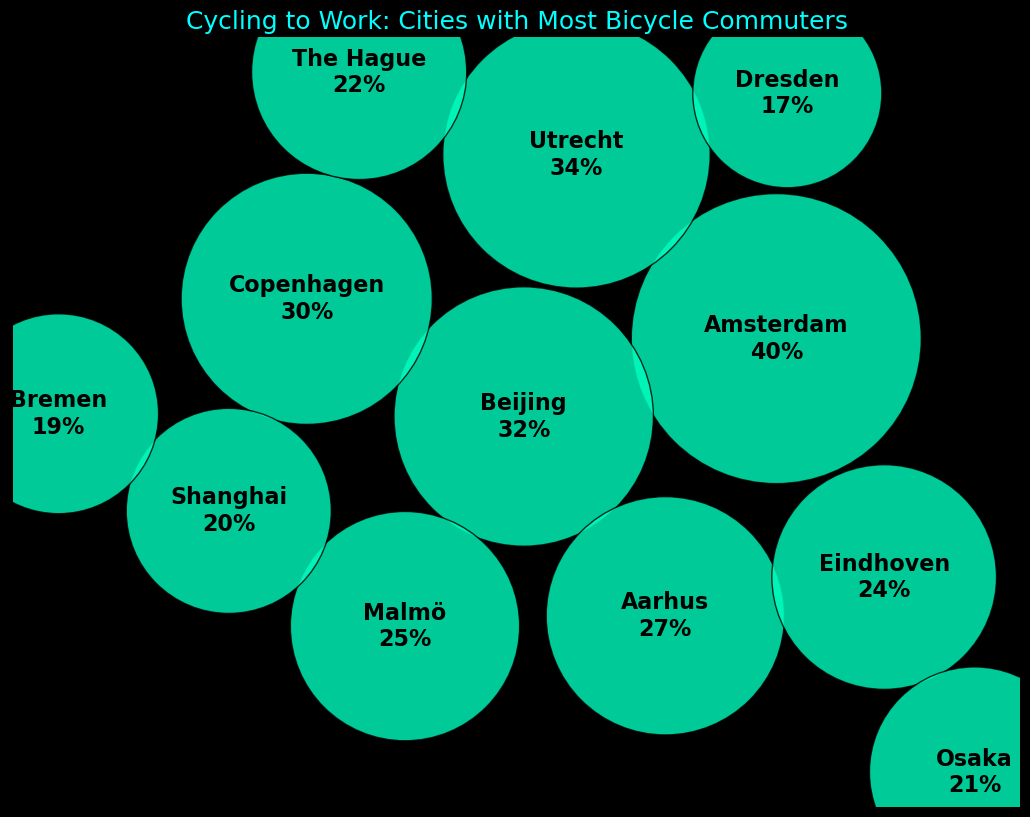

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

cities = ['Amsterdam', 'Utrecht', 'Beijing', 'Copenhagen', 'Aarhus', 'Malmö', 'Eindhoven', 'The Hague', 'Osaka', 'Shanghai', 'Bremen', 'Dresden']
cycling = [40, 34, 32, 30, 27, 25, 24, 22, 21, 20, 19, 17]

sizes = [value * 1090 for value in cycling]

x_positions = np.random.rand(len(cities)) * 5
y_positions = np.random.rand(len(cities)) * 5

def adjust_positions(x_positions, y_positions, sizes):
    for i in range(len(x_positions)):
        for j in range(i+1, len(x_positions)):
            dist = np.sqrt((x_positions[i] - x_positions[j])**2 + (y_positions[i] - y_positions[j])**2)
            min_dist = np.sqrt(sizes[i]/np.pi) + np.sqrt(sizes[j]/np.pi)

            if dist < min_dist:
                angle = np.arctan2(y_positions[j] - y_positions[i], x_positions[j] - x_positions[i])
                overlap = min_dist - dist
                x_positions[j] += np.cos(angle) * overlap
                y_positions[j] += np.sin(angle) * overlap

    return x_positions, y_positions

for _ in range(100): 
    x_positions, y_positions = adjust_positions(x_positions, y_positions, sizes)

plt.figure(figsize=(13, 10))
plt.style.use('dark_background')

plt.scatter(x_positions, y_positions, s=sizes, alpha=0.8, color='#00FFBF', edgecolor='black')

for i, city in enumerate(cities):
    plt.text(x_positions[i], y_positions[i], f'{city}\n{cycling[i]}%', ha='center', va='center', fontsize=16, color='black', weight='bold')

plt.title('Cycling to Work: Cities with Most Bicycle Commuters', fontsize=18, color='#00FFFF')
plt.axis('off')  
plt.show()

In [52]:
from PIL import Image, ImageEnhance

old_map_path = './edo_map.jpg'
old_map = Image.open(old_map_path)

old_map = old_map.convert('RGB')

modern_map_path = './modern_map.jpg' 
modern_map = Image.open(modern_map_path)

modern_map = modern_map.convert('RGB')

resize_factor = 3.4  
new_size = (int(modern_map.width * resize_factor), int(modern_map.height * resize_factor))
modern_map_resized = modern_map.resize(new_size, Image.Resampling.LANCZOS)

blended_map = old_map.copy()

position = (400, 1200) 
blended_map.paste(modern_map_resized, position)

blended_map = Image.blend(old_map, blended_map, alpha=0.35)  
blended_map.show()